In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [69]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [98]:
import catboost
from sklearn import preprocessing

In [119]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.constraints import maxnorm
from keras.wrappers.scikit_learn import KerasRegressor

In [122]:
from sklearn.model_selection import KFold

In [140]:
from sklearn.model_selection import train_test_split

In [116]:
import keras

/Users/aleksandrbojko/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [15]:
data_24h = pd.read_csv('MODIS_C6_Russia_and_Asia_24h.csv')
data_7d = pd.read_csv('MODIS_C6_Russia_and_Asia_7d.csv')
data_virs_24h = pd.read_csv('VNP14IMGTDL_NRT_Russia_and_Asia_24h.csv')

In [7]:
data_7d.shape

(13841, 13)

In [12]:
np.sum(data_24h['confidence'] == 100)

124

In [13]:
data_24h.head(5)

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,confidence,version,bright_t31,frp,daynight
0,14.487,120.902,311.6,1.5,1.2,2018-10-19,215,T,40,6.0NRT,295.0,12.2,D
1,36.987,126.694,309.9,1.3,1.1,2018-10-19,210,T,0,6.0NRT,295.2,11.4,D
2,36.985,126.709,310.7,1.3,1.1,2018-10-19,210,T,59,6.0NRT,297.9,13.2,D
3,34.166,135.195,302.4,1.5,1.2,2018-10-19,210,T,0,6.0NRT,289.1,4.3,D
4,32.160,131.411,314.7,1.1,1.0,2018-10-19,210,T,66,6.0NRT,294.7,12.1,D


In [14]:
data_24h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2305 entries, 0 to 2304
Data columns (total 13 columns):
latitude      2305 non-null float64
longitude     2305 non-null float64
brightness    2305 non-null float64
scan          2305 non-null float64
track         2305 non-null float64
acq_date      2305 non-null object
acq_time      2305 non-null int64
satellite     2305 non-null object
confidence    2305 non-null int64
version       2305 non-null object
bright_t31    2305 non-null float64
frp           2305 non-null float64
daynight      2305 non-null object
dtypes: float64(7), int64(2), object(4)
memory usage: 234.2+ KB


In [19]:
data_virs_24h[data_virs_24h['confidence'] == 'high']

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,confidence,version,bright_ti5,frp,daynight
63,48.50154,133.34692,367.0,0.62,0.72,2018-10-19,230,N,high,1.0NRT,309.9,189.3,D
64,48.49874,133.33919,367.0,0.62,0.72,2018-10-19,230,N,high,1.0NRT,325.1,189.3,D
68,48.50467,133.33440,367.0,0.62,0.72,2018-10-19,230,N,high,1.0NRT,294.4,90.0,D
73,48.50780,133.32185,367.0,0.62,0.72,2018-10-19,230,N,high,1.0NRT,305.6,248.4,D
74,48.49657,133.29073,367.0,0.63,0.72,2018-10-19,230,N,high,1.0NRT,304.4,105.9,D
93,48.51413,133.28525,367.0,0.62,0.72,2018-10-19,230,N,high,1.0NRT,294.6,47.8,D
95,48.21005,132.06018,367.0,0.71,0.75,2018-10-19,230,N,high,1.0NRT,303.3,110.2,D
100,48.20960,132.06175,367.0,0.71,0.75,2018-10-19,230,N,high,1.0NRT,300.0,94.2,D
161,38.13045,117.09946,367.0,0.52,0.67,2018-10-19,406,N,high,1.0NRT,300.4,9.5,D
162,38.13631,117.09673,367.0,0.52,0.67,2018-10-19,406,N,high,1.0NRT,295.5,22.9,D


In [18]:
data_virs_24h.head(5)

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,confidence,version,bright_ti5,frp,daynight
0,47.63015,34.32149,320.7,0.74,0.76,2018-10-19,112,N,nominal,1.0NRT,281.9,4.1,N
1,47.86716,33.43762,305.7,0.67,0.74,2018-10-19,112,N,nominal,1.0NRT,280.4,2.5,N
2,47.87589,33.41182,295.1,0.67,0.74,2018-10-19,112,N,nominal,1.0NRT,283.9,1.7,N
3,47.86678,33.43653,301.7,0.67,0.74,2018-10-19,112,N,nominal,1.0NRT,280.5,2.9,N
4,47.87288,33.39854,296.7,0.67,0.74,2018-10-19,112,N,nominal,1.0NRT,283.7,1.7,N



FRP изображает встроенную в пиксель излучательную мощность огня в МВт (мегаватт). FRP изображает встроенную в пиксель излучательную мощность огня в МВт (мегаватт). Учитывая уникальное пространственное и спектральное разрешение данных, алгоритм обнаружения пожара VIIRS 375 м был настроен и настроен для оптимизации его отклика на небольшие огни при балансировке появления ложных тревог. Частая насыщенность канала I4 среднего инфракрасного диапазона (3,55-3,93 мкм), обеспечивающая обнаружение активных пожаров, требует дополнительных тестов и процедур, чтобы избежать ошибок классификации пикселей. В результате подпиксельная характеристика пожара (например, излучение радиационной мощности [FRP]) является жизнеспособной только при небольших и / или низкоинтенсивных пожарах. Систематические извлечения FRP основаны на гибридном подходе, объединяющем данные 375 и 750 м. Фактически, начиная с 2015 года, алгоритм включал дополнительные данные VIIRS-канала M13 (3.973-4.128 мкм) 750 м как в агрегированном, так и в неагрегированном формате.

In [20]:
data_forest_kaggle = pd.read_csv('forestfires.csv')

In [47]:
data_forest_kaggle[data_forest_kaggle['area'] != 0]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
138,jul,tue,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0,0.36
139,sep,tue,91.0,129.5,692.6,7.0,21.7,38,2.2,0.0,0.43
140,sep,mon,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0,0.47
141,aug,wed,95.5,99.9,513.3,13.2,23.3,31,4.5,0.0,0.55
142,aug,fri,90.1,108.0,529.8,12.5,21.2,51,8.9,0.0,0.61
143,jul,sat,90.0,51.3,296.3,8.7,16.6,53,5.4,0.0,0.71
144,aug,wed,95.5,99.9,513.3,13.2,23.8,32,5.4,0.0,0.77
145,aug,thu,95.2,131.7,578.8,10.4,27.4,22,4.0,0.0,0.90
146,mar,mon,90.1,39.7,86.6,6.2,13.2,40,5.4,0.0,0.95
147,sep,tue,84.4,73.4,671.9,3.2,24.2,28,3.6,0.0,0.96


In [27]:
data_forest_kaggle.drop(columns=['X', 'Y'], inplace=True)

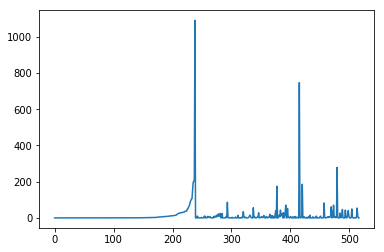

In [36]:
plt.plot(data_forest_kaggle['area'])
plt.show()

In [37]:
data_forest_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 11 columns):
month    517 non-null object
day      517 non-null object
FFMC     517 non-null float64
DMC      517 non-null float64
DC       517 non-null float64
ISI      517 non-null float64
temp     517 non-null float64
RH       517 non-null int64
wind     517 non-null float64
rain     517 non-null float64
area     517 non-null float64
dtypes: float64(8), int64(1), object(2)
memory usage: 44.5+ KB


In [40]:
data_dummy = pd.get_dummies(data_forest_kaggle)
target_dummy = data_dummy['area']
data_dummy.drop(columns=['area'], inplace=True)

In [42]:
data_dummy.head(5)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,month_apr,month_aug,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0,0,...,0,0,0,1,0,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [43]:
target_dummy.head(5)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: area, dtype: float64

In [79]:
data_forest_kaggle['day'].value_counts()

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

In [80]:
data_forest_kaggle.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),
                           (1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
data_forest_kaggle.replace(('mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'), (1, 2, 3, 4, 5, 6, 7), 
                           inplace=True)

In [82]:
data_forest_kaggle.describe()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,7.475822,4.259188,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.275990,2.072929,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,7.000000,2.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,8.000000,5.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,9.000000,6.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,12.000000,7.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


[]

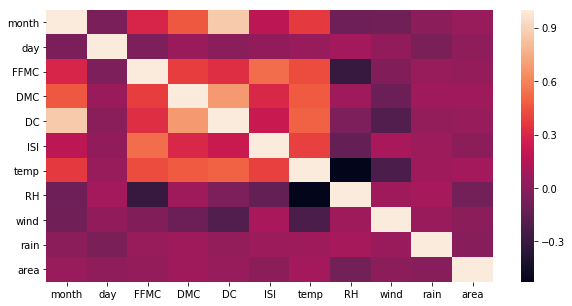

In [85]:
plt.figure(figsize=(10, 5))
sns.heatmap(data_forest_kaggle.corr())
plt.plot()

In [88]:
data_forest_kaggle.corr()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
month,1.000000,-0.050837,0.291477,0.466645,0.868698,0.186597,0.368842,-0.095280,-0.086368,0.013438,0.056496
day,-0.050837,1.000000,-0.041068,0.062870,0.000105,0.032909,0.052190,0.092151,0.032478,-0.048340,0.023226
FFMC,0.291477,-0.041068,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,0.466645,0.062870,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,0.868698,0.000105,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.186597,0.032909,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,0.368842,0.052190,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,-0.095280,0.092151,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,-0.086368,0.032478,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.013438,-0.048340,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366


In [90]:
data_forest_kaggle.head(5)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [95]:
data = data_forest_kaggle.copy()
data.drop(columns=['area'], inplace=True)
target = data_forest_kaggle['area']

In [94]:
data.head(5)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [154]:
data_forest_kaggle = pd.read_csv('forestfires.csv')


In [155]:
data_forest_kaggle.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),
                           (1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
data_forest_kaggle.replace(('mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'), (1, 2, 3, 4, 5, 6, 7), 
                           inplace=True)

In [156]:
data_forest_kaggle.head(5)
data_forest_kaggle.drop(columns=['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI'], inplace=True)

In [165]:
data_forest_kaggle.head(5)

,month,day,temp,RH,wind,rain,area
0,3,5,8.2,51,6.7,0.0,0.0
1,10,2,18.0,33,0.9,0.0,0.0
2,10,6,14.6,33,1.3,0.0,0.0
3,3,5,8.3,97,4.0,0.2,0.0
4,3,7,11.4,99,1.8,0.0,0.0


In [168]:
data_forest_kaggle[data_forest_kaggle['area'] > 0]

,month,day,temp,RH,wind,rain,area
138,7,2,18.0,42,2.7,0.0,0.36
139,9,2,21.7,38,2.2,0.0,0.43
140,9,1,21.9,39,1.8,0.0,0.47
141,8,3,23.3,31,4.5,0.0,0.55
142,8,5,21.2,51,8.9,0.0,0.61
143,7,6,16.6,53,5.4,0.0,0.71
144,8,3,23.8,32,5.4,0.0,0.77
145,8,4,27.4,22,4.0,0.0,0.90
146,3,1,13.2,40,5.4,0.0,0.95
147,9,2,24.2,28,3.6,0.0,0.96


In [186]:
estimator.predict(data_pred)

array([0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [252]:
data_class

,month,day,temp,RH,wind,rain,area
0,3,5,8.2,51,6.7,0.0,0
1,10,2,18.0,33,0.9,0.0,0
2,10,6,14.6,33,1.3,0.0,0
3,3,5,8.3,97,4.0,0.2,0
4,3,7,11.4,99,1.8,0.0,0
5,8,7,22.2,29,5.4,0.0,0
6,8,1,24.1,27,3.1,0.0,0
7,8,1,8.0,86,2.2,0.0,0
8,9,2,13.1,63,5.4,0.0,0
9,9,6,22.8,40,4.0,0.0,0


In [261]:
from math import sin, cos, sqrt, atan2, radians

In [260]:
user_coordinates = [55.753960, 37.620393]

In [256]:
data_distance = pd.read_csv('MODIS_C6_Russia_and_Asia_24h (1).csv')

In [258]:
lat_long = list(zip(data_distance['latitude'], data_distance['longitude']))

In [273]:
lat_long

[(30.535, 26.076999999999998),
 (30.534000000000002, 26.087),
 (29.656, 28.361),
 (29.533, 28.443),
 (12.991, 26.46),
 (12.949000000000002, 26.465999999999998),
 (12.945, 26.489),
 (12.95, 26.46),
 (12.946, 26.484),
 (12.937999999999999, 26.47),
 (12.908, 26.526),
 (12.812999999999999, 26.552),
 (47.875, 33.446999999999996),
 (35.025999999999996, 136.878),
 (48.621, 133.043),
 (48.622, 133.034),
 (50.056000000000004, 128.31),
 (49.643, 129.93200000000002),
 (49.823, 128.719),
 (48.63399999999999, 133.077),
 (48.628, 133.10299999999998),
 (48.63399999999999, 133.02100000000002),
 (48.628, 133.046),
 (48.623000000000005, 133.071),
 (48.623000000000005, 133.015),
 (48.617, 133.04),
 (50.463, 118.818),
 (50.461000000000006, 118.838),
 (50.696000000000005, 115.76),
 (50.693999999999996, 115.788),
 (50.452, 118.816),
 (50.45, 118.836),
 (50.683, 115.758),
 (50.43899999999999, 116.98700000000001),
 (50.437, 117.01100000000001),
 (50.428999999999995, 116.959),
 (50.427, 116.985),
 (50.425, 117

In [283]:
from math import sin, cos, sqrt, atan2, radians

def calculate_distance(lat1, lon1, lat2, lon2):
# approximate radius of earth in km
    R = 6373.0
    
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    
    return distance

In [332]:
from math import sin, cos, sqrt, atan2, radians

def min_distance(user_coordinates_lat, user_coordinates_lon):
    
    def calculate_distance(lat1, lon1, lat2, lon2):
        # approximate radius of earth in km
        R = 6373.0
    
        lat1 = radians(lat1)
        lon1 = radians(lon1)
        lat2 = radians(lat2)
        lon2 = radians(lon2)

        dlon = lon2 - lon1
        dlat = lat2 - lat1

        a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))

        distance = R * c

        return distance
    
    data_distance = pd.read_csv('MODIS_C6_Russia_and_Asia_24h (1).csv')
    lat_long = list(zip(data_distance['latitude'], data_distance['longitude']))
    distance = []
    coor = []
    for i, j in lat_long:
        distance.append(calculate_distance(user_coordinates[0], user_coordinates[1], i, j))
        coor.append([j, i])
    
    dist_coor = sorted(list(zip(distance, coor)))
    
    
    
    return dist_coor[0][0], dist_coor[0][1]

In [338]:
min_distance(user_coordinates[0], user_coordinates[1])

(176.2744053941077, [37.709, 54.17])

In [285]:
calculate_distance(user_coordinates[0], user_coordinates[1], 45.040216, 38.975996)

1195.4971863361702

In [291]:
import staticmap

In [294]:
coordinates = [55.753960, 37.620393]

In [355]:
from staticmap import StaticMap, Line
def img_fire(user_coordinates_lat, user_coordinates_lon):
    m = StaticMap(800, 800, 80)

    coordinates = [[min_distance(user_coordinates_lat, user_coordinates_lon)[1][0],
                    min_distance(user_coordinates_lat, user_coordinates_lon)[1][1]]]
    line_outline = Line(coordinates, 'white', 6)
    line = Line(coordinates, '#D2322D', 10)

    m.add_line(line_outline)
    m.add_line(line)

    image = m.render()
    image.save('ferry.png')

In [356]:
img_fire(user_coordinates[0], user_coordinates[1])

In [357]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [387]:
data_forest_kaggle.to_csv('new_csv.csv')

In [395]:
data_forest_kaggle = pd.read_csv('new_csv.csv')
data_forest_kaggle_target = data_forest_kaggle['area']
data_forest_kaggle.drop(columns=['area', 'Unnamed: 0'], inplace=True)


In [ ]:
array([97.17329458, 25.87481046, 20.50757591, 63.53986266, 63.25718493,
       27.33511692, 19.80833096, 23.74328342])